In [1]:
from sklearn.model_selection import GridSearchCV
import numpy as np

X = np.load('data/X_train.npy')
y = np.genfromtxt('data/y_1.csv', delimiter='\n')
#data_test = np.load('data/X_test.npy')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import random
random.seed(99)

class RandomBinsExtraction(BaseEstimator, TransformerMixin):
    """Build n bins with mean from values"""
    def __init__(self, splits=610, hist_bins=None,
        images_x_from=False, images_x_to=False,
        images_y_from=False, images_y_to=False):

        self.splits = splits
        self.hist_bins = hist_bins

        self.images_x_from = images_x_from
        self.images_x_to = images_x_to
        self.images_y_from = images_y_from
        self.images_y_to = images_y_to
        self.var_indices = [142, 160, 169, 178, 187, 188, 196, 205, 206, 214, 223, 224, 232, 241, 242, 259, 327, 682, 700, 701, 709, 718, 719, 727, 736, 737, 745, 754, 755, 763, 772, 773, 867, 885, 1213, 1222, 1231, 1232, 1240, 1249, 1250, 1258, 1267, 1276, 1285, 1294, 1295, 1303, 1312, 1313, 1330, 1402, 1416, 1753, 1762, 1771, 1772, 1780, 1789, 1790, 1798, 1807, 1816, 1819, 1825, 1834, 1843, 1844, 1852, 1861, 1862, 1888, 1897, 1906, 1924, 1942, 1974, 2284, 2302, 2303, 2311, 2320, 2321, 2329, 2338, 2347, 2356, 2365, 2368, 2374, 2383, 2384, 2392, 2401, 2402, 2419, 2428, 2434, 2437, 2455, 2473, 2505, 2833, 2834, 2842, 2851, 2852, 2860, 2869, 2878, 2887, 2890, 2896, 2905, 2908, 2914, 2923, 2932, 2933, 2950, 2951, 2959, 2968, 2977, 2986, 3013, 3022, 3031, 3373, 3391, 3392, 3400, 3409, 3418, 3427, 3436, 3439, 3445, 3454, 3463, 3472, 3473, 3481, 3482, 3490, 3491, 3499, 3508, 3526, 3544, 3562, 3580, 3904, 3922, 3940, 3949, 3958, 3967, 3976, 3979, 3985, 4003, 4012, 4021, 4022, 4030, 4031, 4039, 4040, 4093, 4102, 4120, 4174, 4462, 4480, 4489, 4498, 4507, 4516, 4525, 4528, 4534, 4543, 4552, 4553, 4561, 4562, 4570, 4571, 4579, 4580, 4651, 4669, 4687, 4705, 4993, 5011, 5029, 5038, 5047, 5056, 5065, 5074, 5083, 5092, 5093, 5101, 5102, 5110, 5111, 5119, 5120, 5128, 5129, 5146, 5209, 5218, 5227, 5236, 5245, 5263, 5551, 5569, 5578, 5587, 5596, 5605, 5614, 5617, 5623, 5632, 5633, 5641, 5642, 5650, 5651, 5659, 5660, 5668, 5669, 5686, 5722, 5740, 5749, 5758, 5767, 5776, 5785, 5803, 6055, 6091, 6109, 6118, 6127, 6136, 6145, 6154, 6157, 6163, 6172, 6173, 6181, 6182, 6190, 6191, 6199, 6200, 6208, 6209, 6226, 6280, 6289, 6298, 6299, 6307, 6316, 6325, 6326, 6343, 6595, 6631, 6649, 6650, 6658, 6667, 6676, 6685, 6694, 6697, 6703, 6712, 6721, 6722, 6730, 6731, 6739, 6740, 6748, 6749, 6766, 6767, 6829, 6838, 6839, 6847, 6848, 6856, 6857, 6865, 6866, 6883, 6884, 7135, 7171, 7189, 7190, 7198, 7207, 7216, 7225, 7234, 7237, 7243, 7252, 7261, 7270, 7271, 7279, 7280, 7288, 7289, 7297, 7306, 7307, 7325, 7369, 7370, 7378, 7379, 7387, 7388, 7396, 7405, 7406, 7423, 7424, 7675, 7711, 7729, 7730, 7738, 7739, 7747, 7756, 7765, 7774, 7777, 7783, 7786, 7792, 7801, 7810, 7811, 7819, 7820, 7828, 7829, 7837, 7838, 7846, 7847, 7865, 7879, 7909, 7918, 7927, 7928, 7936, 7945, 7946, 7963, 7964, 8230, 8248, 8252, 8261, 8266, 8270, 8278, 8279, 8288, 8290, 8296, 8297, 8306, 8308, 8314, 8315, 8317, 8326, 8332, 8333, 8335, 8341, 8344, 8349, 8350, 8351, 8358, 8359, 8360, 8367, 8368, 8369, 8377, 8378, 8386, 8387, 8395, 8396, 8405, 8414, 8432, 8450, 8467, 8468, 8486, 8770, 8779, 8788, 8801, 8806, 8810, 8818, 8819, 8827, 8828, 8830, 8836, 8837, 8846, 8848, 8854, 8855, 8857, 8866, 8872, 8875, 8881, 8884, 8889, 8890, 8891, 8898, 8899, 8900, 8907, 8908, 8909, 8917, 8918, 8926, 8927, 8935, 8936, 8945, 8954, 8990, 9008, 9026, 9310, 9328, 9337, 9341, 9346, 9350, 9358, 9359, 9367, 9368, 9370, 9376, 9377, 9386, 9388, 9394, 9395, 9397, 9406, 9415, 9424, 9429, 9430, 9438, 9439, 9440, 9447, 9448, 9449, 9457, 9458, 9466, 9467, 9475, 9476, 9485, 9494, 9530, 9547, 9548, 9566, 9850, 9868, 9877, 9881, 9890, 9898, 9899, 9907, 9908, 9910, 9916, 9917, 9926, 9928, 9934, 9935, 9937, 9946, 9951, 9955, 9964, 9969, 9970, 9978, 9979, 9980, 9987, 9988, 9989, 9997, 9998, 10006, 10007, 10015, 10016, 10025, 10033, 10034, 10070, 10087, 10088, 10106, 10390, 10399, 10408, 10417, 10421, 10430, 10438, 10439, 10447, 10448, 10450, 10456, 10457, 10459, 10466, 10468, 10474, 10475, 10477, 10486, 10491, 10495, 10504, 10509, 10518, 10519, 10520, 10527, 10528, 10529, 10537, 10538, 10546, 10547, 10555, 10556, 10565, 10573, 10574, 10627, 10628, 10646, 10655, 10939, 10948, 10957, 10961, 10966, 10970, 10978, 10979, 10987, 10988, 10996, 10997, 10999, 11006, 11008, 11015, 11017, 11026, 11031, 11035, 11044, 11049, 11058, 11059, 11060, 11067, 11068, 11069, 11071, 11077, 11078, 11086, 11087, 11095, 11096, 11105, 11113, 11114, 11186, 11195, 11231, 11479, 11488, 11497, 11501, 11506, 11510, 11515, 11519, 11528, 11536, 11537, 11539, 11546, 11548, 11555, 11557, 11566, 11571, 11575, 11580, 11589, 11591, 11598, 11600, 11609, 11611, 11617, 11618, 11626, 11627, 11635, 11636, 11645, 11653, 11654, 11717, 11726, 11735, 11753, 11771, 12019, 12028, 12037, 12041, 12046, 12050, 12055, 12059, 12068, 12077, 12079, 12088, 12097, 12106, 12111, 12115, 12120, 12129, 12131, 12138, 12140, 12149, 12151, 12157, 12158, 12166, 12167, 12169, 12175, 12176, 12185, 12187, 12193, 12194, 12256, 12257, 12266, 12275, 12293, 12310, 12311, 12559, 12568, 12577, 12581, 12586, 12590, 12595, 12599, 12608, 12617, 12628, 12637, 12646, 12651, 12655, 12660, 12669, 12671, 12678, 12680, 12687, 12689, 12691, 12697, 12698, 12709, 12715, 12716, 12725, 12727, 12733, 12734, 12797, 12806, 12815, 12833, 12851, 12869, 13099, 13108, 13117, 13121, 13126, 13135, 13139, 13148, 13157, 13168, 13177, 13186, 13191, 13195, 13200, 13209, 13211, 13218, 13220, 13227, 13229, 13237, 13238, 13249, 13255, 13256, 13265, 13267, 13306, 13373, 13391, 13409, 13639, 13648, 13657, 13666, 13675, 13679, 13688, 13708, 13717, 13726, 13731, 13735, 13740, 13749, 13751, 13758, 13760, 13767, 13769, 13778, 13789, 13807, 13816, 13846, 13852, 13855, 13870, 13877, 14161, 14179, 14197, 14206, 14215, 14224, 14228, 14233, 14248, 14257, 14266, 14271, 14275, 14280, 14289, 14298, 14300, 14307, 14309, 14316, 14318, 14329, 14347, 14356, 14365, 14374, 14377, 14392, 14395, 14410, 14435, 14701, 14719, 14737, 14746, 14755, 14764, 14773, 14797, 14806, 14811, 14815, 14820, 14829, 14838, 14840, 14847, 14849, 14856, 14858, 14869, 14896, 14905, 14914, 14917, 14932, 14935, 14975, 15241, 15259, 15277, 15286, 15295, 15304, 15313, 15322, 15331, 15333, 15337, 15346, 15351, 15355, 15360, 15369, 15378, 15380, 15387, 15389, 15396, 15436, 15445, 15454, 15457, 15472, 15475, 15515, 15763, 15781, 15799, 15808, 15817, 15826, 15835, 15844, 15853, 15862, 15864, 15871, 15873, 15877, 15882, 15886, 15891, 15895, 15900, 15901, 15909, 15918, 15920, 15927, 15929, 15936, 15958, 15976, 15985, 15988, 15994, 15997, 16012, 16318, 16375, 16384, 16393, 16402, 16405, 16413, 16414, 16422, 16423, 16431, 16432, 16435, 16440, 16441, 16450, 16459, 16460, 16537, 16858, 16897, 16915, 16924, 16945, 16953, 16954, 16962, 16963, 16971, 16972, 16975, 16980, 16981, 16990, 17344, 17380, 17437, 17446, 17455, 17461, 17464, 17485, 17493, 17494, 17502, 17503, 17511, 17512, 17520, 17521, 17578, 17884, 17920, 17977, 17986, 17992, 17995, 18001, 18004, 18025, 18033, 18034, 18042, 18043, 18051, 18052, 18060, 18061, 18082, 18085, 18091, 18118, 18424, 18442, 18460, 18469, 18508, 18517, 18526, 18532, 18535, 18541, 18544, 18553, 18565, 18574, 18580, 18582, 18583, 18592, 18601, 18607, 18613, 18616, 18622, 18625, 18631, 18634, 18640, 18649, 18658, 18661, 18667, 18685, 18694, 18703, 18712, 18721, 18757, 18759, 18760, 18775, 18777, 18778, 18793, 18795, 18796, 18811, 18814, 18829, 18964, 18973, 18982, 18991, 19000, 19009, 19012, 19018, 19027, 19030, 19039, 19045, 19048, 19057, 19066, 19072, 19075, 19081, 19084, 19093, 19105, 19111, 19114, 19120, 19123, 19129, 19132, 19141, 19147, 19156, 19162, 19165, 19171, 19174, 19180, 19183, 19189, 19198, 19207, 19216, 19225, 19234, 19243, 19246, 19252, 19261, 19270, 19279, 19281, 19282, 19290, 19297, 19299, 19300, 19306, 19308, 19315, 19317, 19318, 19324, 19333, 19335, 19336, 19342, 19351, 19353, 19360, 19369, 19504, 19513, 19522, 19531, 19540, 19549, 19552, 19558, 19567, 19569, 19570, 19579, 19585, 19587, 19588, 19594, 19596, 19597, 19603, 19605, 19606, 19612, 19614, 19615, 19621, 19624, 19630, 19633, 19639, 19645, 19648, 19651, 19654, 19660, 19663, 19669, 19702, 19705, 19711, 19714, 19720, 19723, 19729, 19738, 19747, 19756, 19765, 19767, 19774, 19776, 19783, 19785, 19792, 19794, 19801, 19803, 19810, 19819, 19821, 19828, 19830, 19837, 19839, 19846, 19848, 19855, 19857, 19864, 19866, 19873, 19875, 19882, 19891, 19893, 19900, 20044, 20053, 20062, 20071, 20080, 20089, 20098, 20107, 20109, 20110, 20116, 20125, 20127, 20134, 20136, 20143, 20145, 20146, 20152, 20154, 20155, 20161, 20163, 20170, 20172, 20179, 20185, 20188, 20194, 20202, 20203, 20206, 20221, 20224, 20233, 20242, 20251, 20260, 20269, 20278, 20287, 20296, 20305, 20307, 20314, 20316, 20323, 20325, 20332, 20341, 20343, 20350, 20359, 20361, 20368, 20370, 20377, 20379, 20386, 20388, 20395, 20397, 20404, 20406, 20413, 20415, 20584, 20593, 20602, 20611, 20629, 20638, 20647, 20649, 20650, 20656, 20665, 20667, 20668, 20674, 20676, 20683, 20685, 20692, 20694, 20701, 20703, 20710, 20719, 20725, 20728, 20734, 20742, 20743, 20746, 20752, 20761, 20764, 20773, 20782, 20791, 20800, 20809, 20818, 20827, 20836, 20845, 20847, 20854, 20863, 20865, 20872, 20881, 20890, 20899, 20901, 20908, 20910, 20917, 20919, 20926, 20928, 20935, 20937, 20944, 20946, 20953, 20955, 20962, 20971, 21115, 21124, 21133, 21169, 21172, 21187, 21190, 21196, 21205, 21208, 21214, 21216, 21217, 21223, 21226, 21232, 21234, 21235, 21241, 21244, 21250, 21253, 21265, 21268, 21274, 21282, 21283, 21292, 21304, 21313, 21322, 21331, 21340, 21349, 21358, 21367, 21376, 21385, 21387, 21394, 21403, 21405, 21412, 21421, 21423, 21430, 21439, 21441, 21448, 21450, 21457, 21459, 21466, 21468, 21475, 21477, 21484, 21486, 21493, 21495, 21502, 21504, 21511, 21520, 21655, 21664, 21673, 21709, 21712, 21730, 21745, 21748, 21754, 21757, 21766, 21772, 21775, 21781, 21784, 21790, 21793, 21802, 21805, 21808, 21811, 21814, 21822, 21823, 21832, 21844, 21853, 21856, 21862, 21871, 21880, 21889, 21898, 21907, 21925, 21934, 21943, 21945, 21952, 21961, 21970, 21979, 21981, 21988, 21990, 21997, 21999, 22006, 22008, 22015, 22024, 22026, 22033, 22042, 22051, 22060, 22195, 22204, 22213, 22279, 22288, 22297, 22306, 22315, 22324, 22330, 22333, 22342, 22345, 22354, 22363, 22371, 22372, 22387, 22390, 22396, 22447, 22465, 22483, 22501, 22546, 22564, 22582, 22600, 22735, 22753, 22828, 22837, 22846, 22855, 22864, 22873, 22885, 22894, 22903, 22911, 22912, 22918, 22921, 22927, 22929, 22930, 22936, 23275, 23386, 23395, 23404, 23413, 23434, 23443, 23446, 23451, 23452, 23458, 23460, 23461, 23469, 23470, 23489, 23548, 23628, 23926, 23935, 23944, 23953, 23983, 23986, 23991, 23992, 24000, 24001, 24009, 24010, 24088, 24168, 24456, 24465, 24474, 24517, 24526, 24531, 24532, 24535, 24540, 24541, 24549, 24550, 24607, 24616, 24625, 24634, 24643, 25005, 25014, 25048, 25057, 25066, 25072, 25075, 25089, 25090, 25098, 25129, 25147, 25156, 25165, 25174, 25183, 25192, 25554, 25577, 25588, 25597, 25606, 25615, 25629, 25638, 25639, 25658, 25669, 25687, 25696, 25705, 25714, 25732, 26094, 26108, 26117, 26128, 26137, 26146, 26155, 26178, 26179, 26198, 26209, 26215, 26227, 26236, 26245, 26254, 26272, 26314, 26616, 26639, 26648, 26657, 26666, 26668, 26677, 26686, 26695, 26718, 26719, 26720, 26746, 26749, 26755, 26758, 26764, 26767, 26776, 26794, 26812, 26836, 26854, 26855, 26872, 26873, 27170, 27179, 27187, 27188, 27197, 27206, 27208, 27217, 27226, 27235, 27277, 27278, 27286, 27287, 27289, 27295, 27298, 27304, 27307, 27313, 27316, 27322, 27340, 27358, 27376, 27385, 27394, 27395, 27403, 27404, 27412, 27413, 27421, 27430, 27701, 27710, 27719, 27727, 27728, 27737, 27745, 27746, 27748, 27757, 27766, 27775, 27808, 27817, 27818, 27826, 27827, 27835, 27836, 27838, 27844, 27845, 27853, 27856, 27862, 27880, 27898, 27916, 27925, 27934, 27935, 27943, 27944, 27952, 27953, 27961, 27970, 27979, 28241, 28249, 28250, 28258, 28259, 28267, 28268, 28276, 28277, 28279, 28285, 28286, 28297, 28306, 28315, 28330, 28339, 28348, 28349, 28357, 28358, 28366, 28367, 28375, 28376, 28378, 28384, 28385, 28393, 28402, 28403, 28420, 28438, 28447, 28456, 28465, 28474, 28475, 28483, 28484, 28492, 28493, 28501, 28502, 28510, 28519, 28520, 28781, 28789, 28790, 28798, 28799, 28807, 28808, 28816, 28817, 28819, 28825, 28826, 28837, 28843, 28846, 28855, 28870, 28879, 28888, 28889, 28897, 28898, 28906, 28907, 28915, 28916, 28918, 28924, 28925, 28933, 28942, 28943, 28960, 28978, 28987, 28990, 28996, 29005, 29006, 29014, 29015, 29023, 29024, 29032, 29033, 29041, 29042, 29050, 29059, 29060, 29321, 29329, 29330, 29338, 29339, 29347, 29348, 29356, 29357, 29359, 29365, 29366, 29377, 29383, 29386, 29395, 29404, 29410, 29419, 29422, 29428, 29429, 29437, 29438, 29446, 29447, 29455, 29456, 29458, 29464, 29465, 29473, 29476, 29482, 29483, 29500, 29509, 29518, 29527, 29530, 29536, 29545, 29546, 29554, 29555, 29563, 29564, 29572, 29573, 29581, 29582, 29590, 29599, 29600, 29869, 29870, 29878, 29879, 29887, 29888, 29890, 29896, 29897, 29899, 29905, 29906, 29914, 29915, 29917, 29923, 29926, 29932, 29935, 29944, 29950, 29959, 29962, 29968, 29969, 29977, 29978, 29986, 29987, 29995, 29996, 30004, 30005, 30013, 30016, 30022, 30023, 30040, 30049, 30058, 30067, 30068, 30076, 30077, 30085, 30086, 30094, 30103, 30104, 30112, 30121, 30122, 30130, 30139, 30140, 30409, 30410, 30418, 30419, 30427, 30428, 30430, 30436, 30437, 30439, 30445, 30446, 30454, 30455, 30457, 30463, 30464, 30466, 30472, 30475, 30481, 30484, 30490, 30499, 30508, 30509, 30517, 30518, 30526, 30527, 30535, 30536, 30544, 30545, 30553, 30556, 30562, 30589, 30598, 30607, 30608, 30616, 30617, 30625, 30626, 30634, 30643, 30644, 30661, 30662, 30679, 30680, 30932, 30949, 30950, 30958, 30959, 30961, 30967, 30968, 30970, 30976, 30977, 30979, 30985, 30986, 30994, 30995, 30997, 31003, 31006, 31012, 31015, 31021, 31024, 31030, 31039, 31048, 31049, 31057, 31058, 31066, 31067, 31075, 31076, 31084, 31085, 31093, 31111, 31129, 31138, 31147, 31148, 31156, 31157, 31165, 31166, 31174, 31183, 31184, 31201, 31202, 31489, 31490, 31498, 31499, 31501, 31507, 31508, 31510, 31516, 31517, 31519, 31525, 31526, 31528, 31534, 31535, 31537, 31543, 31546, 31552, 31555, 31561, 31564, 31570, 31579, 31588, 31589, 31597, 31598, 31606, 31607, 31615, 31616, 31624, 31625, 31633, 31634, 31651, 31669, 31670, 31678, 31687, 31688, 31696, 31697, 31705, 31706, 31723, 31724, 31741, 31742, 31975, 32011, 32029, 32030, 32038, 32039, 32041, 32047, 32048, 32050, 32056, 32057, 32059, 32065, 32066, 32068, 32074, 32075, 32077, 32083, 32086, 32092, 32095, 32101, 32110, 32111, 32119, 32120, 32128, 32129, 32137, 32138, 32146, 32147, 32155, 32156, 32164, 32165, 32173, 32174, 32209, 32210, 32227, 32228, 32236, 32237, 32245, 32246, 32263, 32264, 32281, 32552, 32561, 32570, 32578, 32579, 32587, 32588, 32589, 32596, 32597, 32605, 32607, 32614, 32615, 32623, 32625, 32632, 32633, 32641, 32642, 32650, 32651, 32659, 32660, 32668, 32669, 32677, 32678, 32686, 32687, 32695, 32696, 32705, 32714, 32732, 32750, 32768, 32786, 33101, 33110, 33118, 33119, 33127, 33128, 33129, 33136, 33137, 33145, 33147, 33154, 33163, 33172, 33173, 33181, 33182, 33190, 33191, 33199, 33200, 33208, 33209, 33217, 33218, 33226, 33227, 33235, 33236, 33245, 33254, 33272, 33290, 33308, 33326, 33641, 33658, 33659, 33669, 33676, 33677, 33685, 33687, 33694, 33712, 33713, 33721, 33722, 33730, 33731, 33739, 33740, 33748, 33749, 33757, 33758, 33766, 33767, 33775, 33776, 33785, 33794, 33812, 33829, 33830, 33848, 33866, 34181, 34198, 34199, 34209, 34216, 34217, 34227, 34234, 34252, 34253, 34261, 34262, 34270, 34271, 34279, 34280, 34288, 34289, 34297, 34298, 34306, 34307, 34315, 34316, 34334, 34352, 34369, 34370, 34388, 34406, 34749, 34756, 34767, 34792, 34793, 34801, 34802, 34810, 34811, 34819, 34820, 34828, 34829, 34837, 34838, 34847, 34856, 34874, 34892, 34909, 34910, 34928, 35261, 35289, 35307, 35332, 35333, 35341, 35342, 35350, 35351, 35359, 35360, 35368, 35369, 35377, 35378, 35387, 35396, 35414, 35432, 35449, 35450, 35783, 35801, 35829, 35873, 35881, 35882, 35890, 35891, 35899, 35900, 35908, 35909, 35917, 35918, 35927, 35935, 35936, 35953, 35954, 35972, 36323, 36341, 36421, 36422, 36430, 36431, 36439, 36440, 36448, 36449, 36457, 36458, 36467, 36475, 36476, 36493, 36494, 36863, 36881, 36899, 36961, 36962, 36971, 36979, 36980, 36988, 36989, 36997, 36998, 37007, 37015, 37016, 37034, 37385, 37403, 37412, 37421, 37439, 37502, 37516, 37519, 37520, 37528, 37529, 37537, 37538, 37555, 37556, 37574, 37925, 37943, 37952, 37961, 37979, 38042, 38060, 38077, 38078, 38095, 38096, 38483, 38501, 38519, 38614, 39023, 39041, 39050, 39068, 39086, 39563, 39581, 39590, 39608, 39626, 40130, 40148, 40166]
        
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_new = []
        if self.hist_bins is None:
            self.hist_bins = [[1, 282.10434686113894, 528.4350826042349, 635.7632261805744, 781.9301580581496, 962.0317275933281, 1079.2939329789033, 1246.3707282050862, 1393.0345691835053, 1721.8292294917992]]
            #self.hist_bins = [[1.0, 235.24866102437392, 555.10806045767185, 620.5717939683982, 757.70009508231635, 1048.0503974252849, 1069.6282568493964, 1172.8380040177735, 1426.2991819200652, 1704.724857281253], [1.0, 196.97293715079408, 508.88611185918899, 632.28590798140442, 737.64760569656619, 1000.6238686589269, 1063.0320025934247, 1246.2418278217524, 1372.4446332737627, 1759.490255773924], [1.0, 222.6821748749509, 575.23988224140624, 624.73118483342137, 767.10725854227485, 985.5677797281686, 1066.7153190258327, 1179.9669408904613, 1392.192386749085, 1796.1197198250736], [1.0, 195.87071682278457, 525.83075036919661, 674.15022798621885, 816.13269538465306, 1009.297461936368, 1072.0930455885311, 1185.7267021432633, 1384.4796322828511, 1755.5963250281472], [1.0, 271.12866763470106, 504.82441496759645, 630.9178020384021, 754.86227251056528, 1033.4115925509616, 1112.2632122300427, 1160.9749895790046, 1347.0272744163092, 1713.161222493889]]
            #self.hist_bins = [[1.0, 233.66860542924869, 555.59551894920628, 612.02143976207788, 752.7100426987796, 1053.3927709103418, 1066.3120382192756, 1166.6197788213283, 1432.1684183040782, 1695.3168607375035], [1.0, 187.7377367809529, 500.12918063102677, 626.07837657768528, 728.64705543587945, 996.48093639071226, 1058.3965331121096, 1254.7043673861028, 1367.5429599285153, 1761.0353389287088], [1.0, 218.58882204994109, 579.75370508968751, 617.01270880010566, 763.99863885072978, 978.41362967380235, 1062.8165128309993, 1175.1745030685536, 1391.2402640989021, 1804.9906957900882], [1.0, 186.4150723873415, 520.46274684303592, 676.31556058346257, 822.8291630615837, 1006.8892483236416, 1069.2697847062373, 1182.0862165719159, 1381.9849587394212, 1756.3626220337767], [1.0, 276.72461336164127, 495.25514436111575, 624.43664944608247, 749.30465561267829, 1035.8262050611538, 1117.4739846760513, 1152.3841614948055, 1337.0421292995711, 1705.4404989926668]]
            self.hist_bins = [[1.0, 232.65961378075005, 558.8191901033158, 611.01554100226133, 751.8506948050117, 1052.1025371443798, 1062.2386813212379, 1170.4154624315881, 1436.3987799127171, 1697.5334609065319], [1.0, 186.72353571884148, 499.56891844496221, 624.19256420970828, 730.19039613570453, 998.01457289512143, 1056.5030972543479, 1258.4466689014348, 1369.7502123351373, 1758.2213785228221], [1.0, 221.68156101446493, 581.49667265889093, 614.50991456293559, 761.96240623309268, 980.92869221152398, 1058.6177837244034, 1174.5526614755495, 1395.8783306073485, 1802.5528211949884], [1.0, 186.44657897736735, 524.53480338126076, 680.06149110022682, 825.71120465575359, 1007.2216895885749, 1073.5680922216211, 1179.6545741163768, 1385.8007474622702, 1755.4559466479525], [1.0, 278.30678764984856, 496.3651807461319, 622.25955800991676, 751.08708003863421, 1036.8689696848187, 1122.3469092586117, 1154.0519784850339, 1336.4426643909171, 1704.2387442838437]]
            self.hist_bins = [[1.0, 232.65961378075005, 565.81853397045609, 611.01554100226133, 751.8506948050117, 1052.1025371443798, 1059.0148160033814, 1170.4154624315881, 1436.3987799127171, 1697.5334609065319], [1.0, 186.72353571884148, 508.50609978611561, 624.19256420970828, 730.19039613570453, 998.58889623300081, 1056.5030972543479, 1258.4466689014348, 1369.7502123351373, 1758.2213785228221], [1.0, 221.68156101446493, 586.98614392870741, 614.50991456293559, 761.96240623309268, 980.92869221152398, 1058.6177837244034, 1173.9334424281788, 1395.8783306073485, 1802.5528211949884], [1.0, 186.44657897736735, 524.53480338126076, 680.06149110022682, 825.71120465575359, 1002.6096738879295, 1073.5680922216211, 1177.7070287135298, 1385.8007474622702, 1755.4559466479525], [1.0, 278.30678764984856, 496.3651807461319, 616.33484624047469, 741.23947591665205, 1036.8689696848187, 1122.3469092586117, 1154.0519784850339, 1336.4426643909171, 1704.2387442838437]]

        #var_bin_i = set()        
        #for i in self.var_indices:
        #    var_bin_i.add(int(i / len(self.hist_bins[0]) ))
   
        first = True
        for row in X:
            # This is feature selection 
            if self.images_x_from is not False and self.images_x_to is not False:
                images = np.split(row, 176)[self.images_x_from : self.images_x_to]
                
                # x needs to be set for this, but don't mind at the moment
                if self.images_y_from is not False and self.images_y_to is not False:
                    images_new = []
                    for image in images:
                        images_new.append(np.split(image, 208)[self.images_y_from : self.images_y_to])
                    images = np.array(images_new)

                row = np.array(images).flatten()
               
                
            splits = np.array_split(row, int(len(row) / self.splits))
            if first:
                #print("splits: "+str(len(splits)))
                first = False
                
            features = []
            for j, split in enumerate(splits):
                i = int(j / len(splits) * len(self.hist_bins))
                
                #if j in var_bin_i: # extra split, trying to reduce variance
                #    split_extra = np.array_split(split, 2)
                #    features.append(np.histogram(split_extra[0], bins=self.hist_bins[i])[0])
                #    features.append(np.histogram(split_extra[1], bins=self.hist_bins[i])[0])
                #else: # normal
                features.append(np.histogram(split, bins=self.hist_bins[i])[0])

            #print(len(features))
            X_new.append(np.array(features).flatten())

        return X_new
    
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression, BayesianRidge, PassiveAggressiveRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import BaggingRegressor
from sklearn.decomposition import TruncatedSVD

pipe = Pipeline([
    ('BinsExtraction', RandomBinsExtraction(splits=610,
        images_x_from=50, images_x_to=125, images_y_from=False, images_y_to=False)), # was y_to=196, but worse score
  #      ('vct', VarianceThreshold(threshold=10.0)),
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=10000)),

    #('linreg', LinearRegression(n_jobs=-1))
    ('linearSVR', LinearSVR(C=1.0, max_iter=1300))
    #('par', PassiveAggressiveRegressor(C=100, max_iter=1000))
])

In [ ]:
from sklearn.metrics import mean_squared_error
pipe.fit(X[0:150], y[0:150])
print('fitted')
y_pr = pipe.predict(X[151:228])
print(mean_squared_error(y[151:228], y_pr))

# 52.5900323473 var0.05 bins=10
# 51.6259478991 better bins 41k
# 51.3320775803 added 1-edges, 47k, /500
# 51.6 /300, 78k
# 52.2 /220, 106k
# 55.5 /64, 366k
# 51.1 linearsvr, /500, 53k
# 51.6 /510
# 51.5 /490
# 49.56 /1000, random bins
# 49.09 /610
# 49.08 C=15
# 49.0 max_iter=2000
# 48.99 variance threshold=0.2
# 47.39 better random bins again
# 47.17 y_to=204
# 46.938 x_to=132, (C=1, threshold=0.1)
# 46.936 linreg
# 46.81 x_to=125, y_to=196
# 45.96 better bins  --- splits "610" are 4500 splits really, but don't mind
# 45.26 better bins (again)

# 47.18 bagging
# 47.86 RandomEnsemble
# 90.9 /250
# 51.7 /1000
# 52.0 add random edge, 58k
# 51.7 remove last edge, 47k
# 52.1 /125, 187k
# 52.8160909792 more better bins 99k
# 67.7           kernelridge
# 51.5455457395 much more bins 94k
# 51.5211591462 less bins 31k
# 51.6344647532 more bins 67k
# 56            more better bins 87k features
# 55.5 other splits2, 41k
# 52.6655238717 other splits, 28k features
# 56.237862326  14k features
# 52.1237605257  56k features

import os
os.system('say "hello? hello?"')

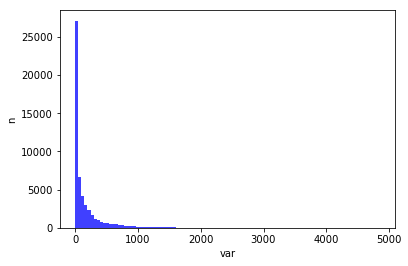

1532
[151, 340, 341, 358, 435, 898, 907, 908, 916, 925, 926, 934, 943, 944, 952, 961, 962, 1074, 1092, 1528, 1537, 1546, 1547, 1555, 1564, 1565, 1573, 1618, 1627, 1628, 1636, 1645, 1646, 1663, 1735, 1749, 2248, 2257, 2258, 2284, 2285, 2293, 2302, 2311, 2314, 2320, 2329, 2338, 2339, 2347, 2356, 2357, 2383, 2392, 2401, 2419, 2437, 2469, 2941, 2959, 2960, 2968, 2977, 2978, 2986, 2995, 3004, 3013, 3022, 3025, 3031, 3040, 3041, 3049, 3058, 3059, 3076, 3085, 3091, 3094, 3112, 3130, 3162, 3652, 3653, 3661, 3670, 3671, 3679, 3688, 3697, 3706, 3709, 3715, 3724, 3727, 3733, 3742, 3751, 3752, 3769, 3770, 3778, 3787, 3796, 3805, 3832, 3841, 3850, 4345, 4363, 4364, 4372, 4381, 4390, 4399, 4408, 4411, 4417, 4426, 4435, 4444, 4445, 4453, 4454, 4462, 4463, 4471, 4480, 4507, 4534, 5020, 5038, 5056, 5065, 5074, 5083, 5092, 5095, 5101, 5119, 5128, 5155, 5156, 5398, 5722, 5740, 5749, 5776, 6037, 6055, 6433, 6658, 6659, 6685, 6686, 6703, 6829, 6856, 6865, 6883, 7333, 7360, 7363, 7369, 7378, 7379, 7387, 738

In [17]:
pipe = Pipeline([
    ('BinsExtraction', RandomBinsExtraction(splits=610,
        images_x_from=50, images_x_to=125, images_y_from=False, images_y_to=False)), # was y_to=196, but worse score
    ('vct', VarianceThreshold(threshold=1000.0)),
])
pipe.fit(X, y)
import matplotlib.pyplot as plt
plt.hist(pipe.named_steps['vct'].variances_, 100, facecolor='blue', alpha=0.75)
plt.xlabel('var'); plt.ylabel('n'); plt.show()
#list(pipe.named_steps['vct'].variances_ [pipe.named_steps['vct'].variances_ > 0.0]).histogram()
print(len(np.where(pipe.named_steps['vct'].variances_ > 1000)[0]))
print(list(pipe.named_steps['vct'].get_support(True)))

In [17]:
#grid.cv_results_
#grid.best_params_
#pipe.named_steps['vct'].variances_
#len(pipe.named_steps['vct'].get_support(True))

train_sizes=np.linspace(.1, 1.0, 4)

import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
plt.figure()
plt.ylim([0, 1])
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(
    pipe, X, y, cv=3, n_jobs=-1, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

KeyboardInterrupt: 

In [4]:
# Search bin subdivision so that there is highest variance
# 1. Divide hist into bins over some rows
# 2. Compute std -> divide bins where it's high, join/drop those where it's low
# 3. Repeat / change rows
kmeans = KMeans(n_clusters=8, n_jobs=-1, random_state=42)

samples = X[0: 5]
centers = []
for i, sample in enumerate(samples):
    # sample = sample[1672390 : -786303]

    sample = sample[(sample > 0) & (sample < 1800)]
    kmeans.fit(np.array([sample]).T)
    centers.append(np.sort(np.array(kmeans.cluster_centers_).flatten()))

    #samples[i] = sample
    #print(str(i) + ' done')

if True: # use all centers
    values = np.array(centers).flatten()
    values = np.sort(values)
else: # take means of centers
    values = np.mean(centers, axis=0)

edges = [1] # leave out 0
for center_1, center_2 in zip(values[:-1], values[1:]):
    edges.append(.5 * (center_1 + center_2))

print('n edges: ' + str(len(edges)))
edges

n edges: 40


[array([  316.06548606,   516.04062473,   672.03912953,   788.4017923 ,
          912.68082233,  1063.06793716,  1221.11834124,  1370.37759073]),
 array([  308.77309614,   504.8323311 ,   661.04570736,   783.16988715,
          921.22162422,  1080.41577968,  1247.41710179,  1393.10546197]),
 array([  259.42693236,   454.41115039,   637.10735577,   783.24697727,
          918.05688785,  1076.03364154,  1238.7439229 ,  1383.01276065]),
 array([  284.2603614 ,   461.84852282,   647.97452156,   826.76038816,
          980.3224361 ,  1135.55237028,  1308.37312973,  1473.53302531]),
 array([  277.75613471,   482.81300987,   649.12127803,   776.62490065,
          913.78209436,  1076.42318956,  1235.8621241 ,  1375.33653253])]

In [ ]:
from sklearn.utils import resample

edges = [1,
 175, 190.0, 200, 210, 220, 230.0, 240, 250.29576676838963, 260.59153353677925, 270.7998907955566, 281.00824805433393, 296.51672876785585, 312.4192910985714, 328.7096455492857,
 345, 365.11915911105507, 385.23831822211014, 421.68407741265736, 458.1298366032046, 517.3519134270805, 576.5739902509565, 609.5574644576008, 626.0492015609229, 642.540938664245, 655.0834926946815, 666.5424184427528, 680, 688.7915018861073, 697.5830037722146, 705.1660075444291, 712.7490113166436, 720.3320150888583, 730.1660075444291, 740, 747.7243484748634, 755.4486969497268, 763.1730454245902, 770.8973938994536,
 778.3608893423097, 785.8243847851659, 792.7855130483395, 799.7466413115131, 807.5810902304434, 816.5985296073651, 825.6159689842868, 836.8877682054391, 848.1595674265914, 863.9400863362044, 879.7206052458175, 905.8611747488183, 932.0017442518191, 950.2522817644435, 968.5028192770679,
 995.0990029527295, 1021.6951866283912, 1045.622987987501, 1084.7830302704533, 1123.9430725534057, 1178.3353557602009, 1203.4127942147347, 1228.4902326692686, 1240.8414534419671, 1253.1926742146657, 1265.5438949873642, 1277.8951157600625, 1288.9475578800311, 1300, 1309.8438400564696, 1319.6876801129395,
 1329.5315201694093, 1339.375360225879, 1347.7457855765365, 1356.1162109271943, 1365.7868972366239, 1375.4575835460535, 1386.4285308142548, 1400, 1408.3298109092373, 1416.6596218184745, 1424.9894327277118, 1433.319243636949, 1442, 1448.5, 1461.25, 1470.625, 1480, 1490.0, 1500,1509.375,
 1518.75, 1530, 1546.25, 1562.5, 1581.25, 1610, 1700.0]
hists = []
for x in X:#resample(X, n_samples=100):
    hists.append(np.histogram(x, bins=edges)[0])
    
std_all = np.std(np.array(hists).flatten())
for bin_i in range(len(hists[0])):
    arr = [h[bin_i] for h in hists]
    print("bin "+str(bin_i)+": "+str(np.std(arr) / std_all))

In [ ]:
from IPython.display import display
new_edges = edges # attention: 49 bins = 50 edges
for i in range(1):
    # compute hists for samples
    hists = []
    for x in X:
        hists.append(np.histogram(x, bins=new_edges)[0])

    ed = [1]
    for bin_i in range(len(hists[0])):
        # compute std for bin i
        arr = [h[bin_i] for h in hists]
        std = np.std(arr) / std_all
        
        if std > 0.35: # if std over threshold, split bin
            ed.append(0.5 * (new_edges[bin_i] + new_edges[bin_i+1])) 
            
        if std < 0.2: # if std too low, join with next bin
            continue
            
        ed.append(new_edges[bin_i+1])
        
    new_edges = ed
    if len(new_edges)>=120: break
        
print(len(new_edges))
display(new_edges)

In [93]:
import random
from sklearn.metrics import mean_squared_error
def run(a, b):  
    pipe = Pipeline([
        ('BinsExtraction', RandomBinsExtraction(splits=a, hist_bins=b,
        images_x_from=50, images_x_to=125, images_y_from=None, images_y_to=None)), # was y_to=196, but worse score
    ('scaler', StandardScaler()),
    ('vct', VarianceThreshold(threshold=0.1)),
    #('linreg', LinearRegression(n_jobs=-1))
    ('linearSVR', LinearSVR(C=1.0, max_iter=1000))
    ])

    pipe.fit(X[0:140], y[0:140])
    print(np.mean(pipe.named_steps['vct'].variances_))
    y_pr = pipe.predict(X[141:228])
    print("\x1b[1;31m%s\x1b[0m \t%s\t%s" % (mean_squared_error(y[141:228], y_pr), a, b))
    #print("\t", hist_bins)

In [18]:
some_bins = [  1.00000000e+00,   2.43148939e+02 ,  5.52670768e+02,   6.63323565e+02,   7.82650357e+02 ,  1.02133853e+03 ,  1.08620935e+03,   1.20392913e+03,   1.39695300e+03 ,  1.75176484e+03]
binss = [[1.0, 232.65961378075005, 558.8191901033158, 611.01554100226133, 751.8506948050117, 1052.1025371443798, 1062.2386813212379, 1170.4154624315881, 1436.3987799127171, 1697.5334609065319], [1.0, 186.72353571884148, 499.56891844496221, 624.19256420970828, 730.19039613570453, 998.01457289512143, 1056.5030972543479, 1258.4466689014348, 1369.7502123351373, 1758.2213785228221], [1.0, 221.68156101446493, 581.49667265889093, 614.50991456293559, 761.96240623309268, 980.92869221152398, 1058.6177837244034, 1174.5526614755495, 1395.8783306073485, 1802.5528211949884], [1.0, 186.44657897736735, 524.53480338126076, 680.06149110022682, 825.71120465575359, 1007.2216895885749, 1073.5680922216211, 1179.6545741163768, 1385.8007474622702, 1755.4559466479525], [1.0, 278.30678764984856, 496.3651807461319, 622.25955800991676, 751.08708003863421, 1036.8689696848187, 1122.3469092586117, 1154.0519784850339, 1336.4426643909171, 1704.2387442838437]]

def random_bins(bb):
    new_bins = [1]
    for j in range(1, len(bb)):
        b = bb[j]
        new_bins.append(random.uniform(b - 5, b + 5))
    return list(np.sort(new_bins))

import copy
#run(610, binss) # reference score, 49.1939936489
for i in range(0, 10):
    news = []
    news = copy.deepcopy(binss)
    
    for j, b in enumerate(news):
        z = np.random.randint(2, len(news[0])-1)
        news[j][z] = random.uniform(b[z] - 10, b[z] + 10)
        z = np.random.randint(2, len(news[0])-1)
        news[j][z] = random.uniform(b[z] - 10, b[z] + 10)
        news[j] = list(np.sort(news[j]))
        #del news[j][z]
    """
    bins.append(random_bins(binss[0]))
    bins.append(random_bins(binss[1]))
    bins.append(random_bins(binss[2]))
    bins.append(random_bins(binss[3]))
    bins.append(random_bins(binss[4]))
    """
    run(610, news)

2378


49.0413962017 	610	[[1.0, 232.65961378075005, 565.81853397045609, 611.01554100226133, 751.8506948050117, 1052.1025371443798, 1059.0148160033814, 1170.4154624315881, 1436.3987799127171, 1697.5334609065319], [1.0, 186.72353571884148, 508.50609978611561, 624.19256420970828, 730.19039613570453, 998.58889623300081, 1056.5030972543479, 1258.4466689014348, 1369.7502123351373, 1758.2213785228221], [1.0, 221.68156101446493, 586.98614392870741, 614.50991456293559, 761.96240623309268, 980.92869221152398, 1058.6177837244034, 1173.9334424281788, 1395.8783306073485, 1802.5528211949884], [1.0, 186.44657897736735, 524.53480338126076, 680.06149110022682, 825.71120465575359, 1002.6096738879295, 1073.5680922216211, 1177.7070287135298, 1385.8007474622702, 1755.4559466479525], [1.0, 278.30678764984856, 496.3651807461319, 616.33484624047469, 741.23947591665205, 1036.8689696848187, 1122.3469092586117, 1154.0519784850339, 1336.4426643909171, 1704.2387442838437]]

49.1939936489 	610	[[1.0, 232.65961378075005, 558.8191901033158, 611.01554100226133, 751.8506948050117, 1052.1025371443798, 1062.2386813212379, 1170.4154624315881, 1436.3987799127171, 1697.5334609065319], [1.0, 186.72353571884148, 499.56891844496221, 624.19256420970828, 730.19039613570453, 998.01457289512143, 1056.5030972543479, 1258.4466689014348, 1369.7502123351373, 1758.2213785228221], [1.0, 221.68156101446493, 581.49667265889093, 614.50991456293559, 761.96240623309268, 980.92869221152398, 1058.6177837244034, 1174.5526614755495, 1395.8783306073485, 1802.5528211949884], [1.0, 186.44657897736735, 524.53480338126076, 680.06149110022682, 825.71120465575359, 1007.2216895885749, 1073.5680922216211, 1179.6545741163768, 1385.8007474622702, 1755.4559466479525], [1.0, 278.30678764984856, 496.3651807461319, 622.25955800991676, 751.08708003863421, 1036.8689696848187, 1122.3469092586117, 1154.0519784850339, 1336.4426643909171, 1704.2387442838437]]

49.4600513908 	610	[[1.0, 233.66860542924869, 555.59551894920628, 612.02143976207788, 752.7100426987796, 1053.3927709103418, 1066.3120382192756, 1166.6197788213283, 1432.1684183040782, 1695.3168607375035], [1.0, 187.7377367809529, 500.12918063102677, 626.07837657768528, 728.64705543587945, 996.48093639071226, 1058.3965331121096, 1254.7043673861028, 1367.5429599285153, 1761.0353389287088], [1.0, 218.58882204994109, 579.75370508968751, 617.01270880010566, 763.99863885072978, 978.41362967380235, 1062.8165128309993, 1175.1745030685536, 1391.2402640989021, 1804.9906957900882], [1.0, 186.4150723873415, 520.46274684303592, 676.31556058346257, 822.8291630615837, 1006.8892483236416, 1069.2697847062373, 1182.0862165719159, 1381.9849587394212, 1756.3626220337767], [1.0, 276.72461336164127, 495.25514436111575, 624.43664944608247, 749.30465561267829, 1035.8262050611538, 1117.4739846760513, 1152.3841614948055, 1337.0421292995711, 1705.4404989926668]]

46.2502180111 	610	[[1.0, 235.24866102437392, 555.10806045767185, 620.5717939683982, 757.70009508231635, 1048.0503974252849, 1069.6282568493964, 1172.8380040177735, 1426.2991819200652, 1704.724857281253], [1.0, 196.97293715079408, 508.88611185918899, 632.28590798140442, 737.64760569656619, 1000.6238686589269, 1063.0320025934247, 1246.2418278217524, 1372.4446332737627, 1759.490255773924], [1.0, 222.6821748749509, 575.23988224140624, 624.73118483342137, 767.10725854227485, 985.5677797281686, 1066.7153190258327, 1179.9669408904613, 1392.192386749085, 1796.1197198250736], [1.0, 195.87071682278457, 525.83075036919661, 674.15022798621885, 816.13269538465306, 1009.297461936368, 1072.0930455885311, 1185.7267021432633, 1384.4796322828511, 1755.5963250281472], [1.0, 271.12866763470106, 504.82441496759645, 630.9178020384021, 754.86227251056528, 1033.4115925509616, 1112.2632122300427, 1160.9749895790046, 1347.0272744163092, 1713.161222493889]]

46.8002965385 	610	[[1.0, 218.55506230929186, 586.75418437206781, 652.2394559820674, 773.8961704594326, 1070.3001532069275, 1132.0119600739936, 1184.2612806674767, 1346.9641002898002, 1718.9557380387023], [1.0, 290.69893927293026, 572.90674625326255, 636.50257766581979, 823.0771012780242, 1059.0456553618278, 1107.4247015526541, 1155.7078943964748, 1399.8097447227119, 1724.0035902340619], [1.0, 218.72954212410218, 542.01253539936533, 653.43333213996402, 821.07268841149516, 1008.7924651333656, 1052.8010062125443, 1169.5052456580929, 1393.3189036641181, 1729.5274681498695], [1.0, 277.08527226987928, 565.65467450638698, 686.47530217708209, 750.38473433034494, 1028.017525595182, 1105.2834708322937, 1158.7544772919573, 1386.8471781779679, 1768.5751652257886], [1.0, 208.48377822151147, 598.37983146074566, 634.52319035808785, 744.42188750405739, 1040.1030410463857, 1134.7469964800446, 1231.2439735529522, 1400.1500086069593, 1734.6145682992137]]

49.0396154526 	610	[[1.0, 243.148939, 552.670768, 663.323565, 782.650357, 1021.33853, 1086.20935, 1203.92913, 1396.953, 1751.76484], [1.0, 169.07888603029684, 476.3993832496185, 659.11986598803605, 833.79724742451754, 954.32415399945558, 1074.2765867000755, 1137.6921525931543, 1366.5221080300698, 1672.6717108194036], [1.0, 243.148939, 552.670768, 663.323565, 782.650357, 1021.33853, 1086.20935, 1203.92913, 1396.953, 1751.76484]]

48.7184635539 	610	[[1.0, 243.148939, 552.670768, 663.323565, 782.650357, 1021.33853, 1086.20935, 1203.92913, 1396.953, 1751.76484], [1.0, 209.35283091979062, 536.59779906296069, 665.28712643428412, 846.84903546339149, 977.79123010728188, 1090.068463939142, 1282.5916662093121, 1350.8990626146378, 1775.4138020921694], [1.0, 189.36260739832539, 563.41978511220316, 652.87738609203211, 793.14021532167249, 945.93292735133036, 1038.5351281645719, 1268.0203915696984, 1345.7126149793392, 1719.8402573532387], [1.0, 321.42123027902852, 513.40658875027952, 676.08423490399321, 771.55097096222892, 941.85367259894826, 1109.1807381440169, 1204.4056231152172, 1466.8640638996865, 1828.0303138977495], [1.0, 174.99250489989211, 566.78723432351444, 637.93448070218324, 723.7844766038387, 1020.7683940864266, 1088.0469595895363, 1204.2431024253162, 1354.1723380995209, 1763.4259373890307]]

47.6369255523 	610	[[1.0, 150.56137278787102, 457.33153706202313, 658.06894123504503, 846.58397003064692, 937.57055999931936, 1071.2933958750946, 1121.1329082414429, 1358.9143850375874, 1652.8984285242545], [1.0, 209.08847589309377, 557.35118459195758, 603.4824475881037, 840.09353019069886, 932.41851138730772, 1028.4963859465074, 1155.4444447957785, 1377.7665328071323, 1804.5238259461053], [1.0, 213.9106433574936, 591.67054972204392, 708.8357454735019, 747.76344324889669, 1094.1244196827156, 1106.1429563548058, 1253.3733914174486, 1418.5599131213776, 1733.4247323867448], [1.0, 162.44558827529511, 481.40325003988937, 598.15057979065659, 718.17945850568867, 950.44081956361697, 1027.7252142536861, 1216.1222768235052, 1451.0664305285418, 1811.3579605658706], [1.0, 312.37402267538255, 476.11342209986088, 719.84074466372897, 727.79325764999419, 935.81641849656705, 1043.7522060542294, 1221.0676377127122, 1306.4885292222425, 1695.0292713230729]]

52.6312906266 	610	[[1.0, 189.5503242912886, 537.61680229523279, 661.83855088542248, 802.02238585544001, 1089.4436739018056, 1104.7103372201052, 1203.9346157852151, 1439.1054376802001, 1715.2109418204398], [1.0, 257.08440054471873, 601.16123993303529, 630.945429072362, 763.43839902428442, 1070.8992572405045, 1104.1228884369598, 1176.2280526906006, 1378.3535938502205, 1715.3140125331508], [1.0, 181.37696696183295, 471.71735456664578, 586.86512054883895, 741.04108090094758, 1046.1274691025374, 1068.8385874678852, 1279.6425439796981, 1339.7434326943328, 1742.3807154403535], [1.0, 242.49799087029592, 527.75976847519109, 654.95633684546453, 717.2060937026539, 1017.4194769917261, 1047.3483273516831, 1216.1081316498964, 1338.2020696090433, 1727.0440044327675], [1.0, 181.92948717846869, 564.34060552941673, 661.48347924277846, 771.58685260861591, 972.83035624273862, 1080.8682734200127, 1222.188461267657, 1368.0888213132946, 1837.9682744390957], [1.0, 270.86026560996629, 560.41396158106988, 581.04266274916552, 785.21051320219874, 1027.4738556561463, 1053.4880107751969, 1161.3082325515952, 1365.8816944637892, 1758.5421910238231], [1.0, 212.28250929231899, 504.76161633794004, 717.47421367917809, 806.91523485302093, 972.19086461331312, 1088.7921316338482, 1233.8858326877341, 1347.4442618786936, 1802.6038207157012], [1.0, 212.01955953249887, 552.60346392398628, 718.69707132651979, 820.94387167564923, 1012.8018285594255, 1036.3346487893725, 1176.8570158106429, 1389.7203424581401, 1732.1080137845734], [1.0, 264.54993069068553, 493.21411047225445, 664.68087465172653, 739.42445495891081, 1073.0362176168549, 1085.1104358681323, 1176.097964292371, 1347.0060260158853, 1693.3133453503201], [1.0, 299.07798108714479, 553.70716020214877, 593.60433660240153, 785.98377964261181, 990.40042335826024, 1097.7682489130668, 1206.6704673991649, 1393.540601361444, 1755.8604522051319]]